# <span style="color:#88228F"> In-vivo QSM image creation </span> </br>

In [133]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import pandas as pd

In [153]:
# Import from monkey_tools
import os, sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
print(parent_dir)

import monkey_tools.extract_metric
importlib.reload(monkey_tools.extract_metric)

from monkey_tools.extract_metric import extract_values_per_vertebrae  # re-import updated function

c:\Users\Admin\Documents\msc_project\Image-processing-strategies


In [ ]:
# Load the respective gray and white matter masks
z1_gm_msk_data = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc1\m2\custom_hc1_m2_gm_msk.nii.gz").get_fdata()
z1_wm_msk_data = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc1\m2\custom_hc1_m2_wm_msk.nii.gz").get_fdata()

z2_gm_msk_data = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc2\m1\custom_hc2_m1_gm_msk.nii.gz").get_fdata()
z2_wm_msk_data = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc2\m1\custom_hc2_m1_wm_msk.nii.gz").get_fdata()

m_gm_msk_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\chi_003_m2_gm_msk.nii.gz").get_fdata()
m_wm_msk_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\chi_003_m2_wm_msk.nii.gz").get_fdata()


In [ ]:
# Load the vertebrae labeled SC masks
z1_vertfile_data = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc1\m2\hc1_m2_sc_msk_labeled.nii.gz").get_fdata()
z2_vertfile_data = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc2\m1\custom1_sc_vert_msk.nii.gz").get_fdata()
m_vertfile_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\chi_003_m2_vertfiles\chi_003_m2_sc_msk_labeled.nii.gz").get_fdata()

## <span style="color:#64DAE8"> BGFR across participants </span> </br>
best performing BGFR boxplot of per-vertebrae WM and GM local field values across subjects (vertebrae values on x-axis, for each vertebrae two boxes, one for WM and one for GM)

In [3]:
zurich_1_best_lf_img = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc1\m2\local_field\opt_pdf\Sepia_localfield.nii.gz")
zurich_2_best_lf_img = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc2\m1\local_field\final_pdf_opt\Sepia_localfield.nii.gz")
montreal_best_lf_img =nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\local_field\pdf_dev\test2_opt\Sepia_localfield.nii.gz")

In [4]:
z1_lf_data = zurich_1_best_lf_img.get_fdata()
z2_lf_data = zurich_2_best_lf_img.get_fdata()   
m_lf_data = montreal_best_lf_img.get_fdata()

In [199]:
lf_data = []

# Zurich 1
print("Processing Zurich 1 - gm")
lf_data += extract_values_per_vertebrae(z1_lf_data, z1_gm_msk_data, z1_vertfile_data, "Zurich1", "GM", "mean")
print("Processing Zurich 1 - wm")
lf_data += extract_values_per_vertebrae(z1_lf_data, z1_wm_msk_data, z1_vertfile_data, "Zurich1", "WM", "mean")

# Zurich 2
print("Processing Zurich 2 - gm")
lf_data += extract_values_per_vertebrae(z2_lf_data, z2_gm_msk_data, z2_vertfile_data, "Zurich2", "GM", "mean")
print("Processing Zurich 2 - wm")
lf_data += extract_values_per_vertebrae(z2_lf_data, z2_wm_msk_data, z2_vertfile_data, "Zurich2", "WM", "mean")

# Montreal
print("Processing Montreal - gm")
lf_data += extract_values_per_vertebrae(m_lf_data, m_gm_msk_data, m_vertfile_data, "Montreal", "GM", "mean")
print("Processing Montreal - wm")
lf_data += extract_values_per_vertebrae(m_lf_data, m_wm_msk_data, m_vertfile_data, "Montreal", "WM", "mean")
best_lf_df = pd.DataFrame(lf_data)

Processing Zurich 1 - gm
Calculating for vertebrae: 1.0
Mean value for vertebrae 1.0, tissue GM: 0.342023583483993
Calculating for vertebrae: 2.0
Mean value for vertebrae 2.0, tissue GM: 0.31831058846267907
Calculating for vertebrae: 3.0
Mean value for vertebrae 3.0, tissue GM: 0.5016622866038233
Total records extracted for GM: 3
Processing Zurich 1 - wm
Calculating for vertebrae: 1.0
Mean value for vertebrae 1.0, tissue WM: -0.05300352302952603
Calculating for vertebrae: 2.0
Mean value for vertebrae 2.0, tissue WM: -0.0842138087247777
Calculating for vertebrae: 3.0
Mean value for vertebrae 3.0, tissue WM: -0.11304792801324563
Total records extracted for WM: 3
Processing Zurich 2 - gm
Calculating for vertebrae: 1.0
Mean value for vertebrae 1.0, tissue GM: 0.4401497665482263
Calculating for vertebrae: 2.0
Mean value for vertebrae 2.0, tissue GM: 0.42409390607947267
Calculating for vertebrae: 3.0
Mean value for vertebrae 3.0, tissue GM: 0.447050301662009
Total records extracted for GM: 3

In [200]:
# Because only one subject has vertebrae 4 and 5 labeled, we will exclude these levels from the plot
best_lf_df = best_lf_df[best_lf_df['Vertebrae'].isin([1, 2, 3])]


In [201]:
print(best_lf_df.shape)
print(best_lf_df.head())


(18, 5)
  Participant_ID  Vertebrae Tissue     Value  Nvoxels
0        Zurich1          1     GM  0.342024      143
1        Zurich1          2     GM  0.318311      158
2        Zurich1          3     GM  0.501662      140
3        Zurich1          1     WM -0.053004      844
4        Zurich1          2     WM -0.084214      812


In [202]:
# Update the vertebrae numbers to strings for better plotting
best_lf_df['Vertebrae'] = best_lf_df['Vertebrae'].astype(str)
# Then change name instead of 1 to C2, 2 to C3, 3 to C4
best_lf_df['Vertebrae'] = best_lf_df['Vertebrae'].replace({'1': 'C1', '2': 'C2', '3': 'C3'})

In [203]:
best_lf_df_wm = best_lf_df[best_lf_df["Tissue"] == "WM"]
best_lf_df_gm = best_lf_df[best_lf_df["Tissue"] == "GM"]

In [204]:
best_lf_df_gm.head()

,Participant_ID,Vertebrae,Tissue,Value,Nvoxels
0,Zurich1,C1,GM,0.342024,143
1,Zurich1,C2,GM,0.318311,158
2,Zurich1,C3,GM,0.501662,140
6,Zurich2,C1,GM,0.440150,156
7,Zurich2,C2,GM,0.424094,130


In [205]:
best_lf_df_wm.head()

,Participant_ID,Vertebrae,Tissue,Value,Nvoxels
3,Zurich1,C1,WM,-0.053004,844
4,Zurich1,C2,WM,-0.084214,812
5,Zurich1,C3,WM,-0.113048,628
9,Zurich2,C1,WM,-0.085377,799
10,Zurich2,C2,WM,-0.098380,592


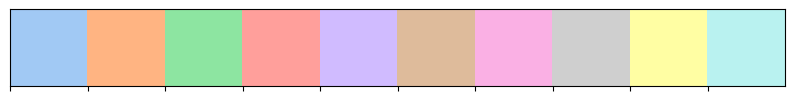

In [235]:
palette = sns.color_palette("pastel")
sns.palplot(palette)

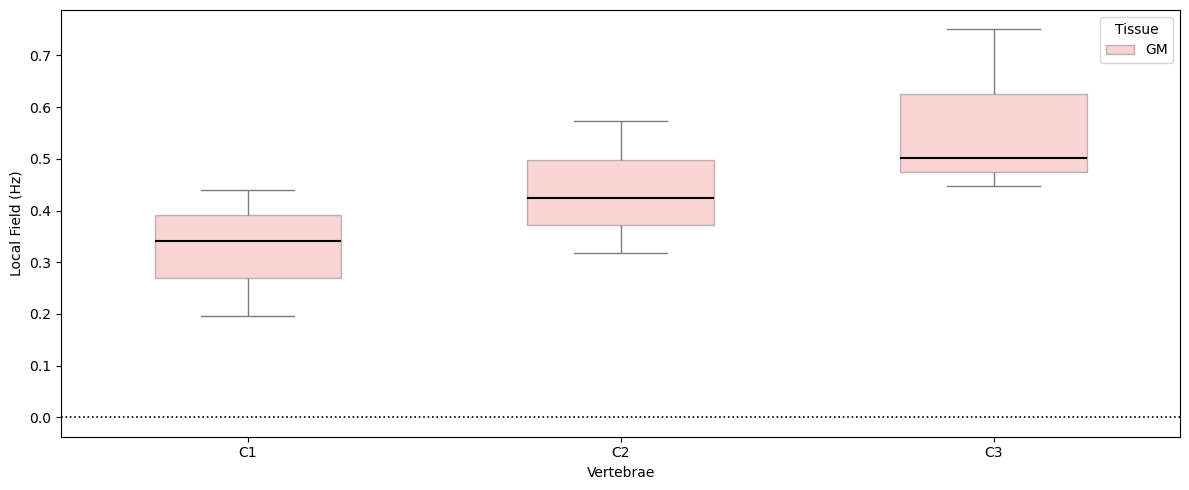

In [243]:
plt.figure(figsize=(12, 5))

# Boxplot (IQR)
sns.boxplot(
    data=best_lf_df_gm,
    x="Vertebrae",
    y="Value",
    color=palette[3],
    dodge=False,
    width=0.5,
    showcaps=True,
    showfliers=False,
    boxprops=dict(alpha=0.5),
    medianprops=dict(color="k", linewidth=1.5),
)
# Axis styling
plt.axhline(0, linestyle=":", color="k", linewidth=1.2)

plt.legend(labels=['GM'], title="Tissue")
plt.ylabel("Local Field (Hz)")

plt.tight_layout()
plt.show()


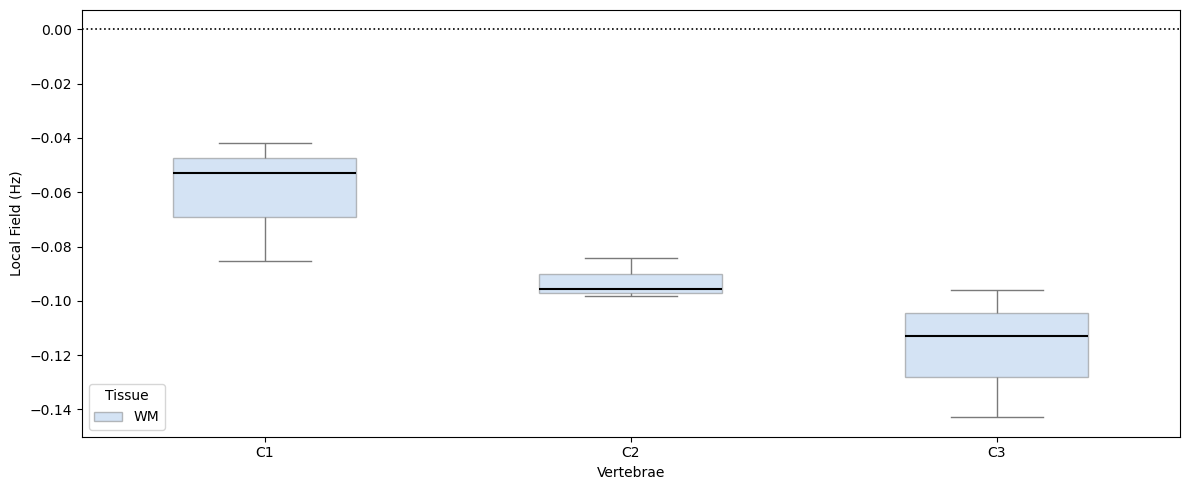

In [242]:
plt.figure(figsize=(12, 5))

# Boxplot (IQR)
sns.boxplot(
    data=best_lf_df_wm,
    x="Vertebrae",
    y="Value",
    color=palette[0],
    dodge=False,
    width=0.5,
    showcaps=True,
    showfliers=False,
    boxprops=dict(alpha=0.5),
    medianprops=dict(color="k", linewidth=1.5),
)
# Axis styling
plt.axhline(0, linestyle=":", color="k", linewidth=1.2)

plt.legend(labels=['WM'], title="Tissue")
plt.ylabel("Local Field (Hz)")

plt.tight_layout()
plt.show()


## <span style="color:#C46FD9"> DI across participants </span> </br>
best performing DI boxplot of per-vertebrae WM and GM susceptibility map values across subjects (vertebrae values on x-axis, for each vertebrae two boxes, one for WM and one for GM)

In [246]:
zurich_1_best_xmap_img = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc1\m2\chi_map\pdf_to_closedForm\opt_to_opt\Sepia_Chimap.nii.gz")
zurich_2_best_xmap_img = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc2\m1\chi_map\opt_pdf_to_all_DI\opt_closedForm\Sepia_Chimap.nii.gz")
montreal_best_xmap_img =nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\chi_map\closed_form_dev\test2_noisyOpt_t1\Sepia_Chimap.nii.gz")

In [247]:
z1_xmap_data = zurich_1_best_xmap_img.get_fdata()
z2_xmap_data = zurich_2_best_xmap_img.get_fdata()   
m_xmap_data = montreal_best_xmap_img.get_fdata()

In [248]:
xmap_data = []

# Zurich 1
print("Processing Zurich 1 - gm")
xmap_data += extract_values_per_vertebrae(z1_xmap_data, z1_gm_msk_data, z1_vertfile_data, "Zurich1", "GM", "mean")
print("Processing Zurich 1 - wm")
xmap_data += extract_values_per_vertebrae(z1_xmap_data, z1_wm_msk_data, z1_vertfile_data, "Zurich1", "WM", "mean")

# Zurich 2
print("Processing Zurich 2 - gm")
xmap_data += extract_values_per_vertebrae(z2_xmap_data, z2_gm_msk_data, z2_vertfile_data, "Zurich2", "GM", "mean")
print("Processing Zurich 2 - wm")
xmap_data += extract_values_per_vertebrae(z2_xmap_data, z2_wm_msk_data, z2_vertfile_data, "Zurich2", "WM", "mean")

# Montreal
print("Processing Montreal - gm")
xmap_data += extract_values_per_vertebrae(m_xmap_data, m_gm_msk_data, m_vertfile_data, "Montreal", "GM", "mean")
print("Processing Montreal - wm")
xmap_data += extract_values_per_vertebrae(m_xmap_data, m_wm_msk_data, m_vertfile_data, "Montreal", "WM", "mean")
best_xmap_df = pd.DataFrame(xmap_data)

Processing Zurich 1 - gm
Calculating for vertebrae: 1.0
Mean value for vertebrae 1.0, tissue GM: 0.008230733631484377
Calculating for vertebrae: 2.0
Mean value for vertebrae 2.0, tissue GM: 0.006960272924044159
Calculating for vertebrae: 3.0
Mean value for vertebrae 3.0, tissue GM: 0.012877721096447203
Total records extracted for GM: 3
Processing Zurich 1 - wm
Calculating for vertebrae: 1.0
Mean value for vertebrae 1.0, tissue WM: -0.0015593100948746931
Calculating for vertebrae: 2.0
Mean value for vertebrae 2.0, tissue WM: -0.001975260313567085
Calculating for vertebrae: 3.0
Mean value for vertebrae 3.0, tissue WM: -0.0026170190994209037
Total records extracted for WM: 3
Processing Zurich 2 - gm
Calculating for vertebrae: 1.0
Mean value for vertebrae 1.0, tissue GM: 0.00605657293561261
Calculating for vertebrae: 2.0
Mean value for vertebrae 2.0, tissue GM: 0.006076906551159202
Calculating for vertebrae: 3.0
Mean value for vertebrae 3.0, tissue GM: 0.00654198125488811
Total records ext

In [249]:
# Because only one subject has vertebrae 4 and 5 labeled, we will exclude these levels from the plot
best_xmap_df = best_xmap_df[best_xmap_df['Vertebrae'].isin([1, 2, 3])]

In [250]:
# Update the vertebrae numbers to strings for better plotting
best_xmap_df['Vertebrae'] = best_xmap_df['Vertebrae'].astype(str)
# Then change name instead of 1 to C2, 2 to C3, 3 to C4
best_xmap_df['Vertebrae'] = best_xmap_df['Vertebrae'].replace({'1': 'C1', '2': 'C2', '3': 'C3'})

In [251]:
best_xmap_df_wm = best_xmap_df[best_xmap_df["Tissue"] == "WM"]
best_xmap_df_gm = best_xmap_df[best_xmap_df["Tissue"] == "GM"]

In [252]:
best_xmap_df_wm.head()

,Participant_ID,Vertebrae,Tissue,Value,Nvoxels
3,Zurich1,C1,WM,-0.001559,844
4,Zurich1,C2,WM,-0.001975,812
5,Zurich1,C3,WM,-0.002617,628
9,Zurich2,C1,WM,-0.000951,799
10,Zurich2,C2,WM,-0.001201,592


In [253]:
best_xmap_df_gm.head()

,Participant_ID,Vertebrae,Tissue,Value,Nvoxels
0,Zurich1,C1,GM,0.008231,143
1,Zurich1,C2,GM,0.006960,158
2,Zurich1,C3,GM,0.012878,140
6,Zurich2,C1,GM,0.006057,156
7,Zurich2,C2,GM,0.006077,130


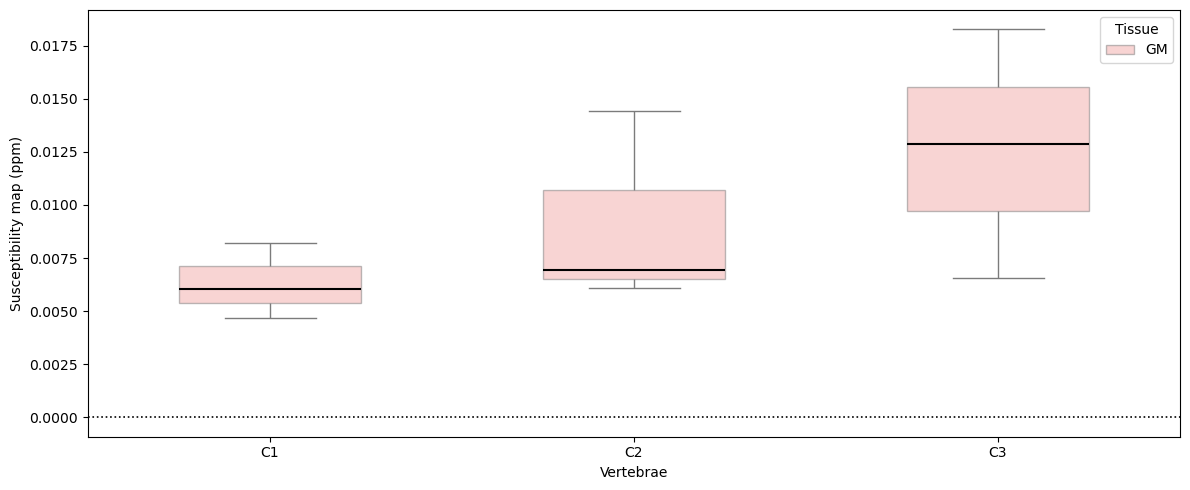

In [254]:
plt.figure(figsize=(12, 5))

# Boxplot (IQR)
sns.boxplot(
    data=best_xmap_df_gm,
    x="Vertebrae",
    y="Value",
    color=palette[3],
    dodge=False,
    width=0.5,
    showcaps=True,
    showfliers=False,
    boxprops=dict(alpha=0.5),
    medianprops=dict(color="k", linewidth=1.5),
)
# Axis styling
plt.axhline(0, linestyle=":", color="k", linewidth=1.2)

plt.legend(labels=['GM'], title="Tissue")
plt.ylabel("Susceptibility map (ppm)")

plt.tight_layout()
plt.show()


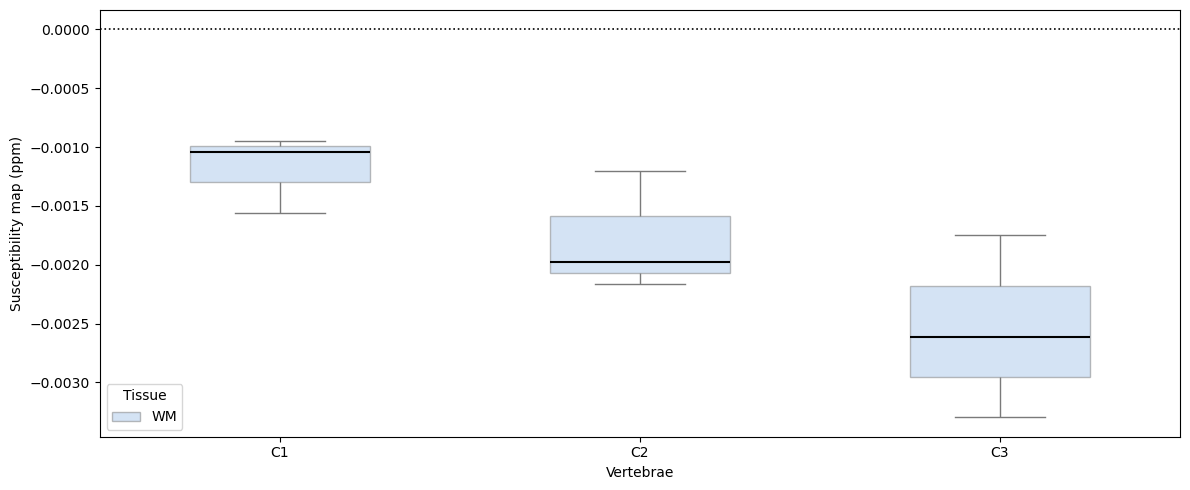

In [255]:
plt.figure(figsize=(12, 5))

# Boxplot (IQR)
sns.boxplot(
    data=best_xmap_df_wm,
    x="Vertebrae",
    y="Value",
    color=palette[0],
    dodge=False,
    width=0.5,
    showcaps=True,
    showfliers=False,
    boxprops=dict(alpha=0.5),
    medianprops=dict(color="k", linewidth=1.5),
)
# Axis styling
plt.axhline(0, linestyle=":", color="k", linewidth=1.2)

plt.legend(labels=['WM'], title="Tissue")
plt.ylabel("Susceptibility map (ppm)")

plt.tight_layout()
plt.show()


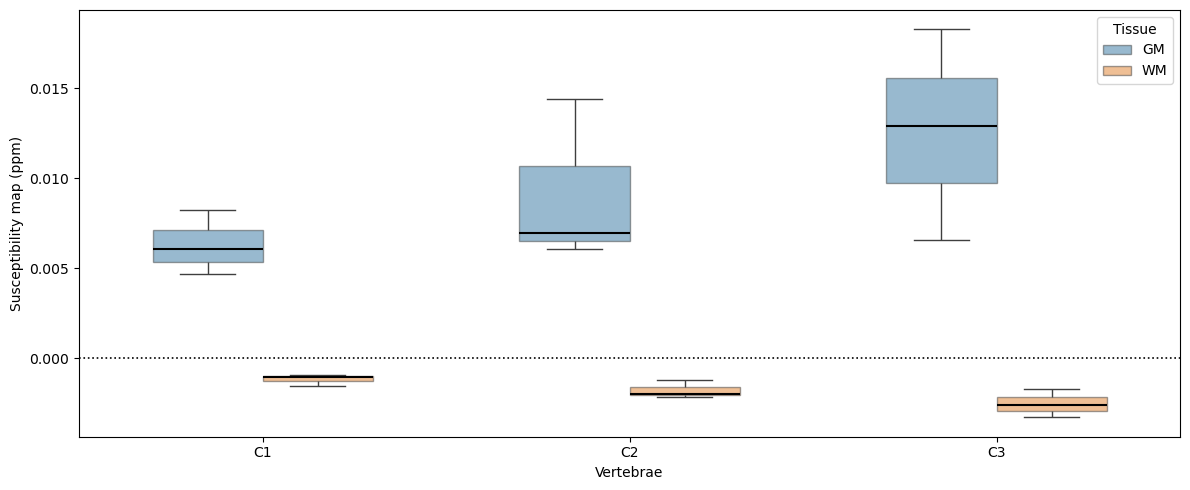

In [256]:
# Now both together:
plt.figure(figsize=(12, 5))
# Boxplot (IQR)
sns.boxplot(
    data=best_xmap_df,
    x="Vertebrae",
    y="Value",
    hue="Tissue",
    dodge=True,
    width=0.6,
    showcaps=True,
    showfliers=False,
    boxprops=dict(alpha=0.5),
    medianprops=dict(color="k", linewidth=1.5),
)
# Axis styling
plt.axhline(0, linestyle=":", color="k", linewidth=1.2
)
plt.legend(title="Tissue")
plt.ylabel("Susceptibility map (ppm)")
plt.tight_layout()
plt.show()